In [24]:
from dotenv import load_dotenv
load_dotenv('.env')	

True

In [25]:
import os

In [26]:
os.environ['LANGSMITH_ENDPOINT'] = "https://api.smith.langchain.com"

In [4]:
base_url = "http://localhost:11434/"
from langchain_ollama import ChatOllama

llm= ChatOllama(
    base_url=base_url,
    model='llama3.2',
    temperature=0.9
)

In [5]:
llm.invoke("Hello, how are you?")

AIMessage(content="I'm just a language model, so I don't have emotions or feelings like humans do. However, I'm functioning properly and ready to assist you with any questions or tasks you may have! How can I help you today?", additional_kwargs={}, response_metadata={'model': 'llama3.2', 'created_at': '2025-01-27T18:28:17.5039106Z', 'done': True, 'done_reason': 'stop', 'total_duration': 29509237400, 'load_duration': 9697853000, 'prompt_eval_count': 31, 'prompt_eval_duration': 4359000000, 'eval_count': 47, 'eval_duration': 15408000000, 'message': Message(role='assistant', content='', images=None, tool_calls=None)}, id='run-6e494cb5-8651-4605-a3ee-dad0e652d6fb-0', usage_metadata={'input_tokens': 31, 'output_tokens': 47, 'total_tokens': 78})

In [6]:
response=''
for chunk in llm.stream("Hello, how are you?"):
    response+=chunk.content
    print(response)

I
I'm
I'm just
I'm just a
I'm just a language
I'm just a language model
I'm just a language model,
I'm just a language model, so
I'm just a language model, so I
I'm just a language model, so I don
I'm just a language model, so I don't
I'm just a language model, so I don't have
I'm just a language model, so I don't have feelings
I'm just a language model, so I don't have feelings or
I'm just a language model, so I don't have feelings or emotions
I'm just a language model, so I don't have feelings or emotions like
I'm just a language model, so I don't have feelings or emotions like humans
I'm just a language model, so I don't have feelings or emotions like humans do
I'm just a language model, so I don't have feelings or emotions like humans do.
I'm just a language model, so I don't have feelings or emotions like humans do. However
I'm just a language model, so I don't have feelings or emotions like humans do. However,
I'm just a language model, so I don't have feelings or emotions like h

In [9]:
from typing import Annotated, TypedDict
from langgraph.graph import StateGraph, START,END
from langgraph.graph.message import add_messages
from langchain_ollama import ChatOllama

llm =ChatOllama(model='llama3.2', base_url=base_url)

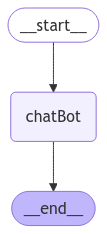

In [14]:
class State(TypedDict):
    message: Annotated[list, add_messages]

def chatBot(state: State) -> State:
    message = state['message']
    response = llm.invoke(message)
    return {'message': [response]}

graph_builder = StateGraph(State)
graph_builder.add_node('chatBot', chatBot)
graph_builder.add_edge(START, "chatBot")
graph_builder.add_edge("chatBot", END)
graph = graph_builder.compile()

from IPython.display import Image, display
display(Image(graph.get_graph().draw_mermaid_png()))

In [15]:
graph.invoke({'message': ['Hello, tell me a joke']})

{'message': [HumanMessage(content='Hello, tell me a joke', additional_kwargs={}, response_metadata={}, id='218b388f-7976-4a86-9a4e-2c5556ccb675'),
  AIMessage(content="Here's one:\n\nWhat do you call a fake noodle?\n\n(wait for it...)\n\nAn impasta!\n\nHope that made you laugh! Do you want to hear another one?", additional_kwargs={}, response_metadata={'model': 'llama3.2', 'created_at': '2025-01-27T18:42:59.6676596Z', 'done': True, 'done_reason': 'stop', 'total_duration': 20109069400, 'load_duration': 8196055500, 'prompt_eval_count': 31, 'prompt_eval_duration': 3127000000, 'eval_count': 36, 'eval_duration': 8774000000, 'message': Message(role='assistant', content='', images=None, tool_calls=None)}, id='run-66da0d11-bdaa-4213-9cb6-b821ce27867b-0', usage_metadata={'input_tokens': 31, 'output_tokens': 36, 'total_tokens': 67})]}

CHATBOT WITH TOOLS AND MEMORY - Bit Like an Agent

In [75]:
from langchain_community.tools.tavily_search import TavilySearchResults
# from langchain_community.tools.tavily_search import TavilySearchResult, TavilySearch
from langgraph.prebuilt import ToolNode, tools_condition
from langchain_core.messages import HumanMessage
from langchain_core.tools import tool


In [76]:
@tool
def webSearch(prompt: str) -> str:
    """
    Search the web for the realtime and latest information on the given prompt.
    for example, news, articles, blogs, stock market, etc.

    Args:
        prompt: The prompt to search for.
    """
    search = TavilySearchResults(
        max_results=3,
        search_depth='advanced',
        include_answer=True,
        include_raw_content=True,
    )
    response = search.invoke(prompt)
    
    return response

# print(webSearch('Who is the current president of the United States?'))
# search.invoke('Who is the president of the United States?')

In [77]:
@tool
def llmSearch(prompt: str) -> str:
    """
    Use the LLM model for general queries and basic information.
    """
    # message = HumanMessage(prompt)
    response = llm.invoke(prompt)
    return response

In [78]:
webSearch

StructuredTool(name='webSearch', description='Search the web for the realtime and latest information on the given prompt.\nfor example, news, articles, blogs, stock market, etc.\n\nArgs:\n    prompt: The prompt to search for.', args_schema=<class 'langchain_core.utils.pydantic.webSearch'>, func=<function webSearch at 0x0000029ED6B036A0>)

In [79]:
llmSearch

StructuredTool(name='llmSearch', description='Use the LLM model for general queries and basic information.', args_schema=<class 'langchain_core.utils.pydantic.llmSearch'>, func=<function llmSearch at 0x0000029ED6B03B00>)

In [80]:
tools = [webSearch, llmSearch]
tools

[StructuredTool(name='webSearch', description='Search the web for the realtime and latest information on the given prompt.\nfor example, news, articles, blogs, stock market, etc.\n\nArgs:\n    prompt: The prompt to search for.', args_schema=<class 'langchain_core.utils.pydantic.webSearch'>, func=<function webSearch at 0x0000029ED6B036A0>),
 StructuredTool(name='llmSearch', description='Use the LLM model for general queries and basic information.', args_schema=<class 'langchain_core.utils.pydantic.llmSearch'>, func=<function llmSearch at 0x0000029ED6B03B00>)]

In [81]:
llm_with_tools = llm.bind_tools(tools)
llm_with_tools

RunnableBinding(bound=ChatOllama(model='llama3.2', base_url='http://localhost:11434/'), kwargs={'tools': [{'type': 'function', 'function': {'name': 'webSearch', 'description': 'Search the web for the realtime and latest information on the given prompt.\nfor example, news, articles, blogs, stock market, etc.\n\nArgs:\n    prompt: The prompt to search for.', 'parameters': {'properties': {'prompt': {'type': 'string'}}, 'required': ['prompt'], 'type': 'object'}}}, {'type': 'function', 'function': {'name': 'llmSearch', 'description': 'Use the LLM model for general queries and basic information.', 'parameters': {'properties': {'prompt': {'type': 'string'}}, 'required': ['prompt'], 'type': 'object'}}}]}, config={}, config_factories=[])

In [82]:
class State(TypedDict):
    # {"messages" : []"your messagea"]}
    messages: Annotated[list, add_messages]

def chatBot(state: State) -> State:
    # message = state['message']
    response = llm_with_tools.invoke(state['messages'])
    return {'messages': [response]}

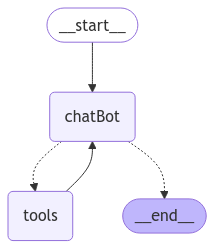

In [86]:
from langgraph.checkpoint.memory import MemorySaver

memory = MemorySaver()

graph_builder = StateGraph(State)
graph_builder.add_node('chatBot', chatBot)
tool_node = ToolNode(tools=tools)

graph_builder.add_node('tools', tool_node)
graph_builder.add_conditional_edges('chatBot', tools_condition)

graph_builder.add_edge("tools", 'chatBot')
graph_builder.set_entry_point('chatBot')

graph = graph_builder.compile(checkpointer=memory)

display(Image(graph.get_graph().draw_mermaid_png()))


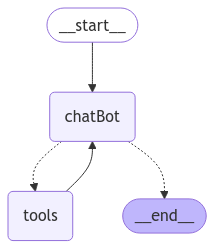

In [87]:
graph

In [88]:
# graph.invoke({'messages': ['Tell me about earth in 3 points']})

config = {"configurable": {"thread_id": 1}}
output = graph.invoke({'messages': ['Tell me about earth in 3 points']}, config=config)
output

{'messages': [HumanMessage(content='Tell me about earth in 3 points', additional_kwargs={}, response_metadata={}, id='13210c91-d903-481f-bd3b-00f998efab39'),
  AIMessage(content='', additional_kwargs={}, response_metadata={'model': 'llama3.2', 'created_at': '2025-01-27T20:36:59.0886892Z', 'done': True, 'done_reason': 'stop', 'total_duration': 42489786200, 'load_duration': 6898494200, 'prompt_eval_count': 246, 'prompt_eval_duration': 28958000000, 'eval_count': 23, 'eval_duration': 6619000000, 'message': Message(role='assistant', content='', images=None, tool_calls=None)}, id='run-53aa68c2-2d61-4a6b-a28e-73290c3c13c8-0', tool_calls=[{'name': 'webSearch', 'args': {'prompt': 'What are three key facts about Earth'}, 'id': 'e399dac2-d570-4c91-bb12-4c96a2519c35', 'type': 'tool_call'}], usage_metadata={'input_tokens': 246, 'output_tokens': 23, 'total_tokens': 269}),
  ToolMessage(content='[{"url": "https://www.funkidslive.com/learn/top-10-facts/top-10-facts-about-earth/", "content": "Top 10 Fa

In [90]:
config = {"configurable": {"thread_id": 1}}
while True:
    user_input = input("You: ")
    if user_input in ['exit', "quit", "q"]:
        print("Goodbye!")
        break
    output = graph.invoke({'messages': [user_input]}, config=config)
    output['messages'][-1].pretty_print()

================================== Ai Message ==================================

Here's one:

Why did the employee bring a ladder to the meeting?

Because she wanted to take her career to the next level! (ba-dum-tss)
Goodbye!
